# Proyek Analisis Data: Bike Sharing
- **Nama:** Dylan Amadeus
- **Email:** dylanamadeus05@gmail.com
- **ID Dicoding:** dylanamadeus

## Menentukan Pertanyaan Bisnis

- Pada **waktu apakah** peminjaman sepeda paling banyak terjadi dalam sehari, dan **apakah terdapat perbedaan** signifikan dalam jumlah penyewaan antara pagi, siang, sore, atau malam hari?
- Bagaimana **distribusi peminjaman** sepeda dari masing-masing musim?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Terdapat 2 File CSV pada dataset "bike-sharing" yang saya gunakan ini, yaitu day.csv dan hour.csv, maka langkah pertama yang harus dilakukan adalah mencari tahu data-data apa saja yang relevan untuk dianalisis. Pada tahap ini, saya menggunakan function read_csv() dari library pandas untuk membaca isi dari file yang ada.

In [127]:
day_data = pd.read_csv('data/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [128]:
hour_data = pd.read_csv('data/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [129]:
day_data.info()
print("\n\n")
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (

**Insight:**

Dengan melihat isi data (info()) dari kedua file, didapati bahwa dataset day.csv memiliki 731 baris dan 16 kolom, sedangkan hour.csv terdapat 17.379 baris dan 17 kolom. Pada kedua file ini dapat diketahui bahwa **tidak** terdapat kolom yang memiliki value *NULL*.

Terdapat pula kolom dteday bertipe object yang berisi tanggal yang bisa diubah menjadi tipe datetime untuk analisis waktu supaya dapat menjawab pertanyaan bisnis nantinya.

In [130]:
# Ngeliat parameter data
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [131]:
# Ngeliat parameter data
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Melalui function describe() ini dapat diketahui mengenai persebaran distribusi informasi yang akan dianalisis beserta dengan parameter yang dapat dijadikan acuan.

In [132]:
# Cek data NULL
print(day_data.isnull().sum())
print("\n\n")
print(hour_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Walaupun sudah dapat terlihat melalui function info() sebelumnya, saya kembali membuktikan bahwa dataset yang digunakan benar-benar tidak terdapat *missing values*.

### Cleaning Data

In [133]:
dteday = ["dteday"]
for col in dteday:
    day_data[col] = pd.to_datetime(day_data[col])
    hour_data[col] = pd.to_datetime(hour_data[col])

day_data.info()
print("\n\n")
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Karena pada tahap ***Assesing Data*** dirasa bahwa data sudah cukup bersih dan hanya ditemukan bahwa ada satu kolom, yaitu dteday yang perlu dibersihkan dengan cara diubah tipe datanya, maka pada tahap ini dilakukanlah pembersihan pada data tersebut.

## Exploratory Data Analysis (EDA)

### *Explore* informasi distribusi data dan pengelompokannya

In [134]:
day_data.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [135]:
hour_data.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**

Kedua dataset ini mencakup data dua tahun penuh dan berisi informasi tentang jumlah penyewaan sepeda harian baik untuk pengguna kasual maupun terdaftar, bersama dengan informasi cuaca dan musim. Setelah eksplorasi lebih lanjut, didapati bahwa :
- Variabel musim dapat dieksplorasi lebih lanjut untuk melihat bagaimana mereka mempengaruhi penyewaan sepeda.
- Sewa sepeda terdistribusi merata sepanjang dua tahun, **namun** penyewaan lebih tinggi selama jam-jam tertentu (kemungkinan saat commuting) dan hari kerja.

In [136]:
hourly_rentals = hour_data.groupby("hr")['cnt'].sum()

print(hourly_rentals)

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64


Terlihat distribusi perbedaan intensitas penyewaan sepeda pada masing-masing jam.

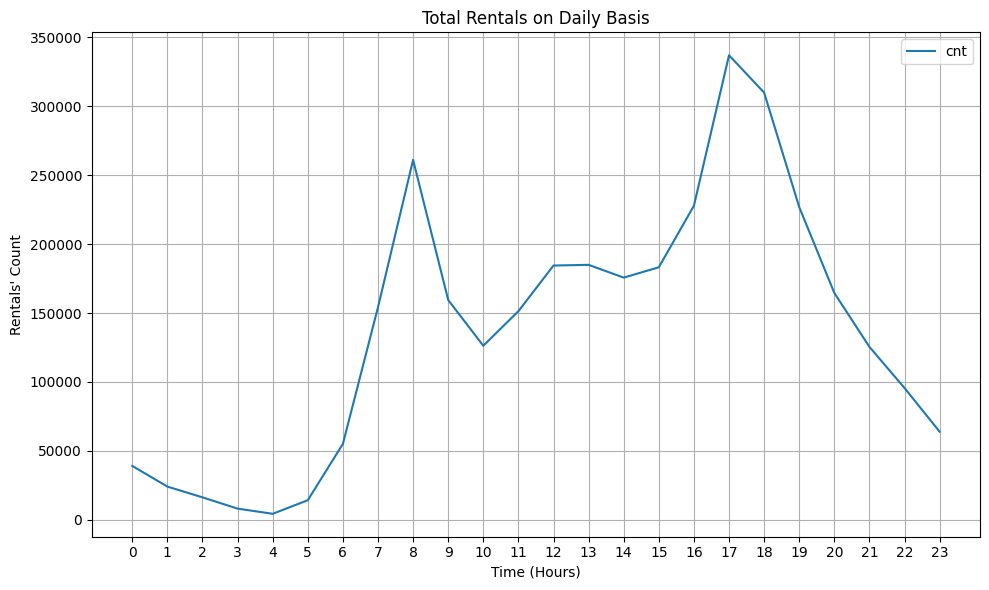

In [137]:
plt.figure(figsize=(10, 6))
hourly_rentals.plot(kind='line')

plt.xlabel('Time (Hours)')
plt.ylabel('Rentals\' Count')
plt.title('Total Rentals on Daily Basis')
plt.legend()

plt.xticks(hourly_rentals.index)
plt.grid(True)
plt.tight_layout()
plt.show()

Melalui grafik ini, terlihat jelas jam-jam yang dapat dikatakan banyak penyewa atau banyak pelanggan aktif.

In [138]:
hourly_rentals_avg = hour_data.groupby("hr")['cnt'].mean()

print(hourly_rentals_avg)

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


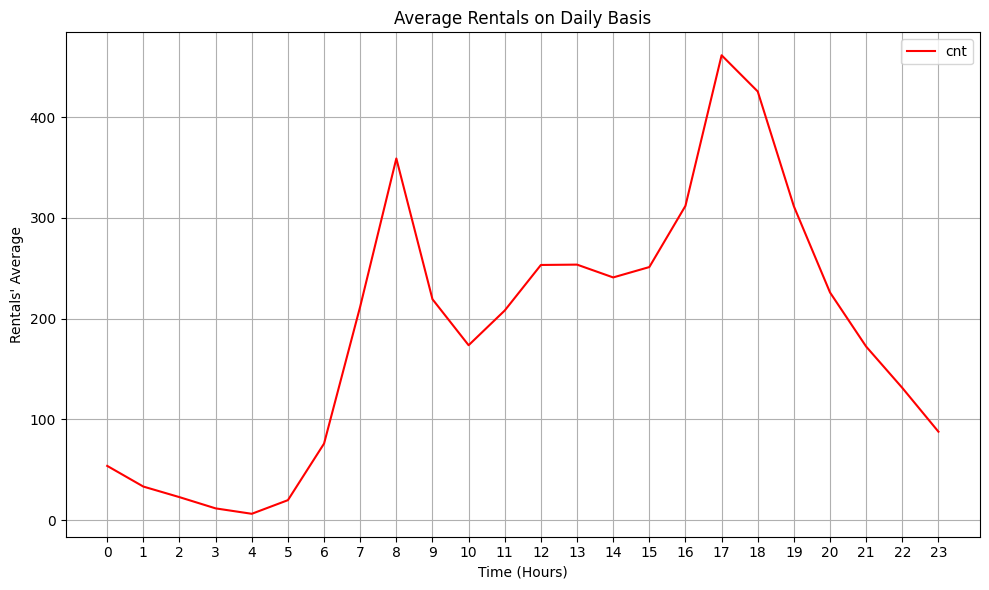

In [139]:
plt.figure(figsize=(10, 6))
hourly_rentals_avg.plot(kind='line', color='red')

plt.xlabel('Time (Hours)')
plt.ylabel('Rentals\' Average')
plt.title('Average Rentals on Daily Basis')
plt.legend()

plt.xticks(hourly_rentals_avg.index)
plt.grid(True)
plt.tight_layout()
plt.show()

Selain menghitung sum(), saya juga melakukan perhitungan untuk rata-rata nya, dengan tujuan tren peminjaman sepeda dalam satu harinya terlihat lebih jelas.

In [140]:
seasonal_sum = day_data.groupby("season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

print(seasonal_sum)

        instant  casual  registered      cnt
season                                      
1           181   60622      410726   471348
2           184  203522      715067   918589
3           188  226091      835038  1061129
4           178  129782      711831   841613


Selanjutnya, saya mencoba untuk melakukan eksplorasi lebih lanjut terkait hubungan peminjaman sepeda dengan musim-musim yang ada. Melalui perhitungan total yang di kelompokan (*group-by()*) berdasarkan musim, mulai terlihat perbedaan jumlah pinjaman antar tiap musimnya.

<Figure size 1000x600 with 0 Axes>

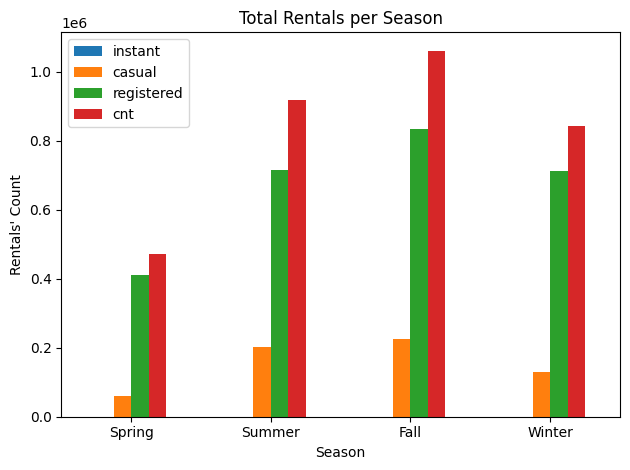

In [141]:
season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
seasonal_sum = seasonal_sum[seasonal_sum.index.isin(season_name.keys())]
seasonal_sum.index = seasonal_sum.index.map(season_name)

plt.figure(figsize=(10, 6))
seasonal_sum.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Rentals\' Count')
plt.title('Total Rentals per Season')
plt.legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Terlihat pada chart bahwa musim nomor 3 lah yang paling banyak mendapatkan pinjaman sepeda diikuti dengan musim nomor 2, kemudian 4 dan terakhir 1.

In [142]:
seasonal_avg = day_data.groupby("season").agg({
    "instant": "nunique",
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

print(seasonal_avg)

        instant       casual   registered          cnt
season                                                
1           181   334.928177  2269.204420  2604.132597
2           184  1106.097826  3886.233696  4992.331522
3           188  1202.611702  4441.691489  5644.303191
4           178   729.112360  3999.050562  4728.162921


<Figure size 1000x600 with 0 Axes>

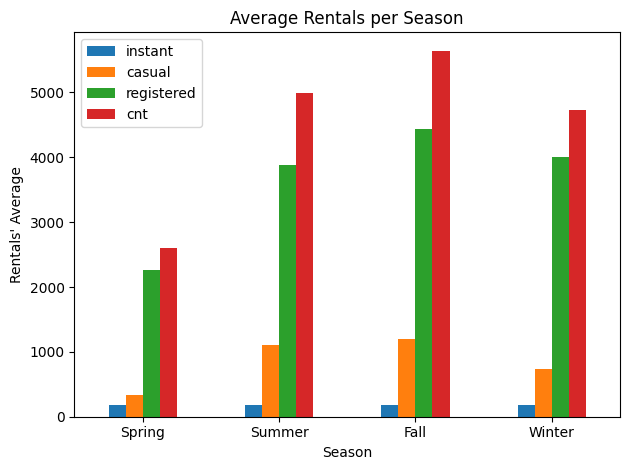

In [143]:
season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
seasonal_avg = seasonal_avg[seasonal_avg.index.isin(season_name.keys())]
seasonal_avg.index = seasonal_avg.index.map(season_name)

plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Rentals\' Average')
plt.title('Average Rentals per Season')
plt.legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Melalui perhitungan rata-rata tiap musimnya, dapat dikatakan tren yang dihasilkan serupa dengan perhitungan total (sum) yuang telah dilakukan sebelumnya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Pada **waktu apakah** peminjaman sepeda paling banyak terjadi dalam sehari, dan **apakah terdapat perbedaan** signifikan dalam jumlah penyewaan antara pagi, siang, sore, atau malam hari?

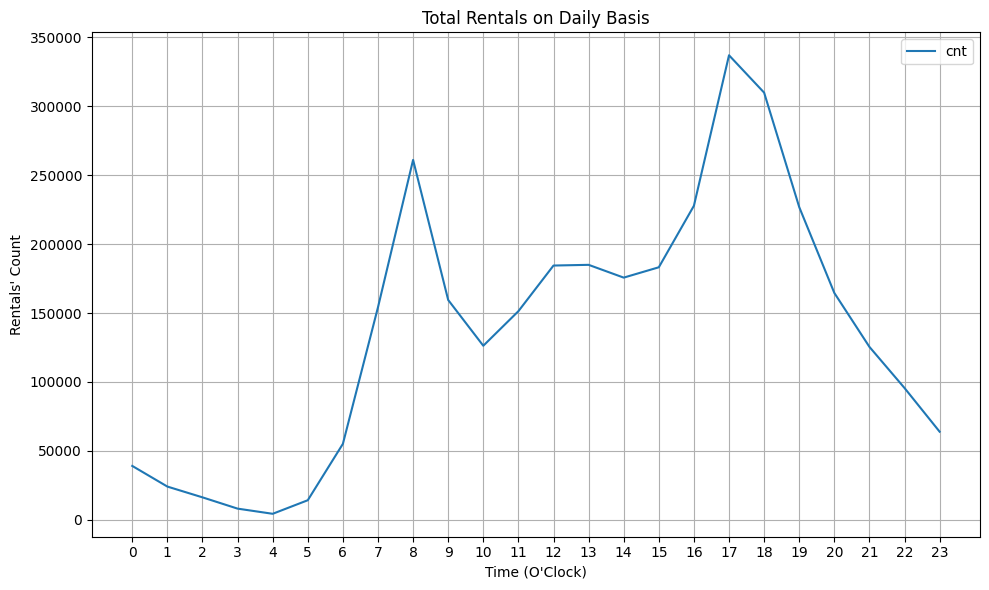

In [145]:
hourly_rentals = hour_data.groupby("hr")['cnt'].sum()
plt.figure(figsize=(10, 6))
hourly_rentals.plot(kind='line')

plt.xlabel('Time (O\'Clock)')
plt.ylabel('Rentals\' Count')
plt.title('Total Rentals on Daily Basis')
plt.legend()

plt.xticks(hourly_rentals.index)
plt.grid(True)
plt.tight_layout()
plt.show()

### Jawaban:

Peminjaman sepeda **paling banyak** terjadi pada pukul **17:00 sore**, dan **peminjaman paling sedikit** terjadi pada pukul **04:00 pagi**. Selain itu, terjadi pula lonjakan signifikan lain di pagi hari pada jam **8.00 pagi**.

Tren ini dapat dijelaskan oleh kebiasaan pengguna sepeda yang cenderung melakukan penyewaan di jam pergi dan pulang kerja (08:00 dan 17:00), sementara pada jam dini hari (04:00), aktivitas penyewaan sangat minim karena sebagian besar orang belum memulai aktivitas harian mereka. Perbedaan ini cukup signifikan dan menunjukkan pola penggunaan sepeda yang bergantung pada waktu-waktu tertentu dalam sehari.

### Pertanyaan 2:
Bagaimana **distribusi peminjaman** sepeda dari masing-masing musim?

<Figure size 1000x600 with 0 Axes>

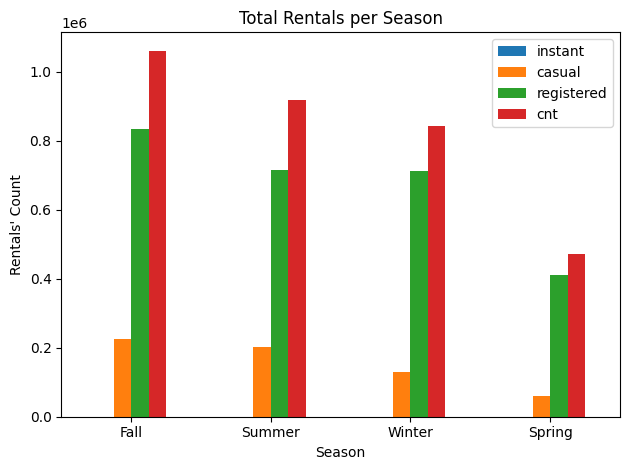

In [147]:
seasonal_sum = day_data.groupby("season").agg({
    "instant": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

season_name = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
seasonal_sum = seasonal_sum[seasonal_sum.index.isin(season_name.keys())]
seasonal_sum.index = seasonal_sum.index.map(season_name)

plt.figure(figsize=(10, 6))
seasonal_sum.plot(kind='bar')

plt.xlabel('Season')
plt.ylabel('Rentals\' Count')
plt.title('Total Rentals per Season')
plt.legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Berdasarkan chart tersebut, dapat disimpulkan bahwa peminjaman sepeda **tertinggi** terjadi pada **musim gugur**, diikuti oleh **musim panas**. Peminjaman sepeda **paling rendah** terjadi pada **musim semi**. Hal ini menunjukkan bahwa orang lebih sering meminjam sepeda saat cuaca lebih hangat dan menyenangkan, seperti di musim gugur dan musim panas. Sebaliknya, musim semi dan musim dingin mungkin memiliki lebih sedikit peminjaman karena cuaca yang lebih dingin atau lebih tidak menentu.



## Conclusion

- **Conclution pertanyaan 1**

  Puncak peminjaman sepeda terjadi pada dua waktu utama, yaitu pada jam 8 pagi dan jam 5 sore, yang bertepatan dengan jam sibuk aktivitas harian. Di sisi lain, jumlah peminjaman paling sedikit terjadi pada dini hari, sekitar jam 4 pagi. Dari tren ini, kita bisa menyusun strategi operasional yang lebih efisien, seperti membuka layanan penyewaan sepeda yang berfokus pada siang hingga sore hari. Selain itu, memastikan ketersediaan sepeda yang lebih banyak saat sore hari akan membantu memenuhi permintaan tinggi dan meningkatkan keuntungan.

- **Conclution pertanyaan 2**

  Puncak peminjaman sepeda terlihat di musim gugur dan musim panas, sementara musim dingin dan musim semi mengalami penurunan signifikan. Dari visualisasi data, musim gugur menjadi musim dengan permintaan tertinggi, diikuti oleh musim panas, musim dingin, dan akhirnya musim semi. Informasi ini dapat digunakan untuk merancang strategi penyewaan sepeda yang lebih efektif, dengan fokus pada peningkatan ketersediaan dan promosi selama musim gugur dan musim panas untuk memaksimalkan keuntungan. Sebaliknya, pada musim dingin dan musim semi, penyewaan sepeda dapat disesuaikan untuk mengurangi biaya operasional di tengah penurunan permintaan.